## Imports

In [1]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

## Data Prep

In [2]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases_for_psm_600k.csv')

In [3]:
df.shape

(588973, 16)

In [4]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [5]:
df.head()

personid                           encounterid  \
0  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
1  00ef14c9-c421-4d20-ba99-a1b5836336e5  31cb9b95-0455-4444-bb29-4d611d2349f8   
2  0212d914-ab07-43e4-bf24-9ce3ed4871d3  4b7e2217-0be9-4311-9617-cfe81963f66c   
3  021d12a6-ba01-4b9d-8d23-0861955cdab9  3f75490c-832c-408d-b194-584203cad904   
4  025a8acf-b20c-44f9-b678-c5f84e9337cb  85a8170d-5b72-42ff-891a-1a7d128df125   

  condition  albumin_24_hours  ICU   LOS_hours  CCI  bl_albumin_value  \
0       D62                 1    1  184.466667    2               4.0   
1       D72                 1    1  550.325000    1               2.6   
2       D63                 1    0  653.233333    2               2.4   
3       D61                 1    0  140.600000    4               1.9   
4       D69                 1    0   45.500000    4               2.3   

   albumin_lab_baseline_severity  qSOFA  hospital_free_days  beta_blocker  \
0                            0.0      1                25.0             0   
1                            1.0      0                67.0             1   
2                            1.0      0                62.0             0   
3                            1.0      1                62.0             0   
4                            1.0      1                29.0             0   

   Cirrhosis_score  nutritional_anemia  SEWS  albumin  
0                0                   0     3        1  
1                0                   0     1        1  
2                0                   0     3        1  
3                0                   0     2        1  
4                1                   0     2        1

In [8]:
df.condition.value_counts()

D64    176910
D72     71234
D63     67389
D50     60196
D69     50065
D62     41025
D68     24489
D61     18360
D75     10873
D57     10553
D70     10212
D53      8379
D89      7943
D84      5643
D51      4097
D86      4069
D80      3293
D56      2777
D73      2023
D59      1942
D58      1792
D65      1644
D83       973
D82       561
D66       493
D76       446
D71       367
D52       318
D81       262
D55       259
D60       168
D67       147
D78        37
D74        33
D77         1
Name: condition, dtype: int64

In [16]:
df_d64 = df[df['condition'] == 'D64'].sample(20000)
df_d72 = df[df['condition'] == 'D72'].sample(20000)
df_d63 = df[df['condition'] == 'D63'].sample(20000)

In [18]:
print(df_d64.shape)
print(df_d72.shape)
print(df_d63.shape)

(20000, 16)
(20000, 16)
(20000, 16)


In [21]:
print(df_d64.albumin_24_hours.value_counts())
print(df_d72.albumin_24_hours.value_counts())
print(df_d63.albumin_24_hours.value_counts())

0    17880
1     2120
Name: albumin_24_hours, dtype: int64
0    17933
1     2067
Name: albumin_24_hours, dtype: int64
0    14417
1     5583
Name: albumin_24_hours, dtype: int64


In [42]:
df_d64.head()

personid  \
502418  2500ec43-3854-4e51-b79c-b2a81655eea5   
42494   3a12813e-4384-47f7-aeb4-f1c289ea7733   
355967  4cc04d66-2bd3-470c-9627-1da65d963eb3   
50561   ad20adb4-c869-48e1-83e0-b132ac778fa6   
68596   e85bd5f6-222c-40c0-928a-3749b39ddab4   

                                 encounterid condition  albumin_24_hours  ICU  \
502418  d928cf5e-d039-4eb6-ae27-3e3c4b4cd4d1       D64                 0    0   
42494   3a3ff6da-00c0-4084-8786-45cd9011b646       D64                 1    1   
355967  a22c9517-e143-4764-a4af-6421a909ab8e       D64                 0    0   
50561   aba96373-b101-49da-97b6-93a157c65ef1       D64                 1    1   
68596   b55ee59a-4078-49f0-81b4-cb6862c91527       D64                 1    0   

         LOS_hours  CCI  bl_albumin_value  albumin_lab_baseline_severity  \
502418    8.016667    1               4.2                            0.0   
42494   210.562778    4               3.1                            0.0   
355967   14.983333    3               3.4                            0.0   
50561   206.661111    3               3.5                            0.0   
68596    75.366667    9               2.8                            1.0   

        qSOFA  hospital_free_days  beta_blocker  Cirrhosis_score  \
502418      0                87.0             0                0   
42494       3                81.0             1                0   
355967      0                50.0             0                0   
50561       0                 0.0             1                0   
68596       0                82.0             1                1   

        nutritional_anemia  SEWS  albumin  
502418                   0     0        0  
42494                    0     2        1  
355967                   0     0        0  
50561                    0     2        1  
68596                    0     1        1

In [22]:
df_a24 = df[['personid', 'encounterid', 'condition', 'albumin_24_hours', 'LOS_hours', 'hospital_free_days']]

In [23]:
df_a24.head()

personid                           encounterid  \
0  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
1  00ef14c9-c421-4d20-ba99-a1b5836336e5  31cb9b95-0455-4444-bb29-4d611d2349f8   
2  0212d914-ab07-43e4-bf24-9ce3ed4871d3  4b7e2217-0be9-4311-9617-cfe81963f66c   
3  021d12a6-ba01-4b9d-8d23-0861955cdab9  3f75490c-832c-408d-b194-584203cad904   
4  025a8acf-b20c-44f9-b678-c5f84e9337cb  85a8170d-5b72-42ff-891a-1a7d128df125   

  condition  albumin_24_hours   LOS_hours  hospital_free_days  
0       D62                 1  184.466667                25.0  
1       D72                 1  550.325000                67.0  
2       D63                 1  653.233333                62.0  
3       D61                 1  140.600000                62.0  
4       D69                 1   45.500000                29.0

In [24]:
#df.drop(columns=['personid', 'encounterid', 'albumin_24'], inplace=True)

In [25]:
df_d64.shape

(20000, 16)

In [26]:
df.head()

personid                           encounterid  \
0  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
1  00ef14c9-c421-4d20-ba99-a1b5836336e5  31cb9b95-0455-4444-bb29-4d611d2349f8   
2  0212d914-ab07-43e4-bf24-9ce3ed4871d3  4b7e2217-0be9-4311-9617-cfe81963f66c   
3  021d12a6-ba01-4b9d-8d23-0861955cdab9  3f75490c-832c-408d-b194-584203cad904   
4  025a8acf-b20c-44f9-b678-c5f84e9337cb  85a8170d-5b72-42ff-891a-1a7d128df125   

  condition  albumin_24_hours  ICU   LOS_hours  CCI  bl_albumin_value  \
0       D62                 1    1  184.466667    2               4.0   
1       D72                 1    1  550.325000    1               2.6   
2       D63                 1    0  653.233333    2               2.4   
3       D61                 1    0  140.600000    4               1.9   
4       D69                 1    0   45.500000    4               2.3   

   albumin_lab_baseline_severity  qSOFA  hospital_free_days  beta_blocker  \
0                            0.0      1                25.0             0   
1                            1.0      0                67.0             1   
2                            1.0      0                62.0             0   
3                            1.0      1                62.0             0   
4                            1.0      1                29.0             0   

   Cirrhosis_score  nutritional_anemia  SEWS  albumin  
0                0                   0     3        1  
1                0                   0     1        1  
2                0                   0     3        1  
3                0                   0     2        1  
4                1                   0     2        1

## Initialize PsmPy Class

In [27]:
psm = PsmPy(df_d64, treatment='albumin_24_hours', indx='encounterid', exclude = ['personid', 'condition', 'albumin', 'LOS_hours', 'hospital_free_days'])

In [28]:
%%time
psm.logistic_ps(balance = True)

Wall time: 12.5 s


In [29]:
df_psm = psm.predicted_data

In [30]:
df_psm.head()

encounterid  ICU  CCI  bl_albumin_value  \
0  b1a1c1d5-130a-41bc-92c9-36065520b9e6    0    1               3.0   
1  b1a1c1d5-130a-41bc-92c9-36065520b9e6    0    1               3.0   
2  1912b3a6-1dfe-4a84-95e9-2ff956e5f74a    1    8               3.8   
3  1912b3a6-1dfe-4a84-95e9-2ff956e5f74a    1    8               3.8   
4  3a3ff6da-00c0-4084-8786-45cd9011b646    1    4               3.1   

   albumin_lab_baseline_severity  qSOFA  beta_blocker  Cirrhosis_score  \
0                            0.0      0             1                0   
1                            0.0      0             1                0   
2                            0.0      1             0                1   
3                            0.0      1             0                1   
4                            0.0      3             1                0   

   nutritional_anemia  SEWS  propensity_score  propensity_logit  \
0                   0     0          0.416345         -0.337796   
1                   0     0          0.416345         -0.337796   
2                   0     5          0.931213          2.605475   
3                   0     5          0.931213          2.605475   
4                   0     2          0.985522          4.220565   

   albumin_24_hours  
0                 0  
1                 1  
2                 0  
3                 1  
4                 1

## Plot the propensity score / propensity logits

In [31]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 9min 58s


C:\ProgramData\Anaconda3\lib\site-packages\psmpy\psmpy.py:347: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


Wall time: 532 ms


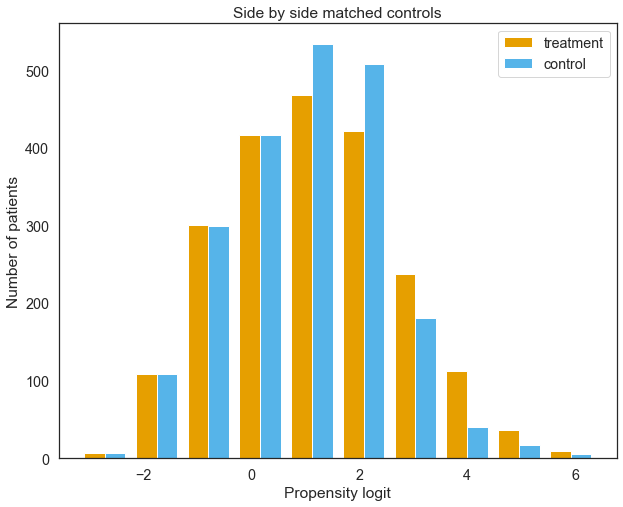

In [32]:
%%time
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

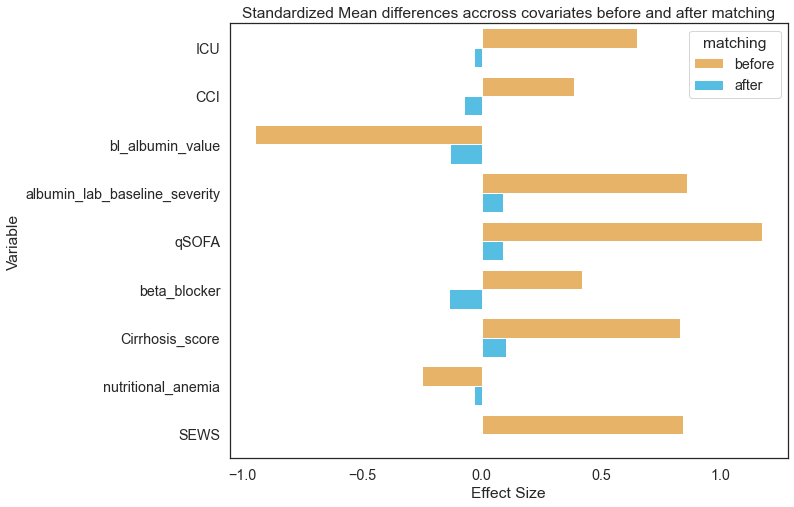

In [33]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [34]:
matched_df = psm.df_matched

In [35]:
matched_df.head()

encounterid  ICU  CCI  bl_albumin_value  \
0  b1a1c1d5-130a-41bc-92c9-36065520b9e6    0    1               3.0   
1  1912b3a6-1dfe-4a84-95e9-2ff956e5f74a    1    8               3.8   
2  3a3ff6da-00c0-4084-8786-45cd9011b646    1    4               3.1   
3  aba96373-b101-49da-97b6-93a157c65ef1    1    3               3.5   
4  b55ee59a-4078-49f0-81b4-cb6862c91527    0    9               2.8   

   albumin_lab_baseline_severity  qSOFA  beta_blocker  Cirrhosis_score  \
0                            0.0      0             1                0   
1                            0.0      1             0                1   
2                            0.0      3             1                0   
3                            0.0      0             1                0   
4                            1.0      0             1                1   

   nutritional_anemia  SEWS  propensity_score  propensity_logit  \
0                   0     0          0.416345         -0.337796   
1                   0     5          0.931213          2.605475   
2                   0     2          0.985522          4.220565   
3                   0     2          0.675103          0.731356   
4                   0     1          0.865700          1.863460   

   albumin_24_hours  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [36]:
matched_df.shape

(4239, 13)

## Matched Ids

In [37]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  b1a1c1d5-130a-41bc-92c9-36065520b9e6  b1a1c1d5-130a-41bc-92c9-36065520b9e6
1  1912b3a6-1dfe-4a84-95e9-2ff956e5f74a  1912b3a6-1dfe-4a84-95e9-2ff956e5f74a
2  3a3ff6da-00c0-4084-8786-45cd9011b646  a6cfb142-295f-4fe0-8bc0-c267ba944945
3  aba96373-b101-49da-97b6-93a157c65ef1  af3e479c-317d-4257-aeaf-85bc571d1695
4  b55ee59a-4078-49f0-81b4-cb6862c91527  7274c6b4-e720-41cb-bd02-c0e447c77024

## Effect sizes per variables

In [38]:
psm.effect_size

Variable matching  Effect Size
0                             ICU   before     0.650587
1                             ICU    after    -0.031815
2                             CCI   before     0.388175
3                             CCI    after    -0.075889
4                bl_albumin_value   before    -0.947786
5                bl_albumin_value    after    -0.132430
6   albumin_lab_baseline_severity   before     0.858624
7   albumin_lab_baseline_severity    after     0.090009
8                           qSOFA   before     1.173941
9                           qSOFA    after     0.088357
10                   beta_blocker   before     0.420479
11                   beta_blocker    after    -0.137053
12                Cirrhosis_score   before     0.830225
13                Cirrhosis_score    after     0.103229
14             nutritional_anemia   before    -0.248219
15             nutritional_anemia    after    -0.032371
16                           SEWS   before     0.842510
17                           SEWS    after     0.001363

## Explore Matched df

In [39]:
matched_df.head()

encounterid  ICU  CCI  bl_albumin_value  \
0  b1a1c1d5-130a-41bc-92c9-36065520b9e6    0    1               3.0   
1  1912b3a6-1dfe-4a84-95e9-2ff956e5f74a    1    8               3.8   
2  3a3ff6da-00c0-4084-8786-45cd9011b646    1    4               3.1   
3  aba96373-b101-49da-97b6-93a157c65ef1    1    3               3.5   
4  b55ee59a-4078-49f0-81b4-cb6862c91527    0    9               2.8   

   albumin_lab_baseline_severity  qSOFA  beta_blocker  Cirrhosis_score  \
0                            0.0      0             1                0   
1                            0.0      1             0                1   
2                            0.0      3             1                0   
3                            0.0      0             1                0   
4                            1.0      0             1                1   

   nutritional_anemia  SEWS  propensity_score  propensity_logit  \
0                   0     0          0.416345         -0.337796   
1                   0     5          0.931213          2.605475   
2                   0     2          0.985522          4.220565   
3                   0     2          0.675103          0.731356   
4                   0     1          0.865700          1.863460   

   albumin_24_hours  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [41]:
matched_df.albumin_24_hours.value_counts()

1    2120
0    2119
Name: albumin_24_hours, dtype: int64

In [ ]:
matched_df.shape

## Join Matched df with earlier df on encounterid to add outcome variables

In [ ]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [ ]:
f_df.shape

In [ ]:
f_df.head()

In [ ]:
# f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases_matched_600k.csv', index=False)